In [47]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd


def myfilter(data, epsilon=None, trials=None, size=None, extras=None):
    """
    Filters rows.
    """
    if epsilon is not None:
        data = data.query(f"epsilon == {epsilon}")
    
    if trials is not None:
        data = data.query(f"trials == {trials}")
    
    if size is not None:
        data = data.query(f"size == {size}")
    
    if extras is not None:
        data = data.query(extras)

    return data


def bcdf(data):
    """
    Returns how many simulations converged to 'B' with density less than X.
    """
    df = data.copy()
    df['B'] = (df.action == 'B').astype(int)
    df['C'] = (df.converged == True).astype(int)

    df0 = df.copy()

    # Sort values by clustering coefficient
    df0 = df0.sort_values("clustering", ascending=True)

    df0['S0'] = df0['C'].cumsum()
    df0['S'] = df0['B'].cumsum()
    df0['S'] = df0['S'] / df0['S0']

    df1 = df.copy()

    # Sort values by density
    df1 = df1.sort_values("density", ascending=True)

    df1['S0'] = df1['C'].cumsum()
    df1['S'] = df1['B'].cumsum()
    df1['S'] = df1['S'] / df1['S0']

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    df0.plot("clustering", "S", ax=axes[0], xlim=[0, 1], ylim=[0.6, 1], style=".-")
    df1.plot("density", "S", ax=axes[1], xlim=[0, 1], ylim=[0.6, 1], style=".-")

    # axes[0].plot([0, 1], [0, 1], transform=axes[0].transAxes)
    # axes[1].plot([0, 1], [0, 1], transform=axes[1].transAxes)


In [73]:
complete1 = pd.read_csv(f"../polygraphs-cache/zollman-effect/summary/complete.csv")
complete1.groupby("epsilon").count()

,kind,steps,size,polarized,trials,undefined,duration,uid,action,converged,density,clustering
epsilon,,,,,,,,,,,,
0.001,17600,17600,17600,17600,17600,17600,17600,17600,17600,17600,17600,17600
0.002,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
0.004,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
0.008,10120,10120,10120,10120,10120,10120,10120,10120,10120,10120,10120,10120
0.010,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400,7400
0.016,120,120,120,120,120,120,120,120,120,120,120,120
0.100,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500


# 1. Polarisation

##### Notes

Compare rates of ignorance in polarization models _vs_ Zollman effect models.

Restrict attention to complete networks, and give separate data for different mistrust factors $m$ in the polarization models.

Table shows how many simulations were run for each set of parameters, and how many converged to $B$.

In [85]:
complete = pd.read_csv("../polygraphs-cache/polarisation/summary/complete.csv")
complete

,converged,uid,undefined,duration,kind,action,steps,trials,polarized,size,epsilon,mistrust,antiupdating,density,clustering,filepath
0,True,00feda11b2fb4e2ba156d929a5a592e4,False,66.136026,complete,B,4925,64,False,16,0.001,1.1,False,1.0,1.0,2022-02-16/00feda11b2fb4e2ba156d929a5a592e4/01...
1,True,00feda11b2fb4e2ba156d929a5a592e4,False,14.957253,complete,B,1209,64,False,16,0.001,1.1,False,1.0,1.0,2022-02-16/00feda11b2fb4e2ba156d929a5a592e4/02...
2,False,00feda11b2fb4e2ba156d929a5a592e4,False,30.582674,complete,?,2712,64,True,16,0.001,1.1,False,1.0,1.0,2022-02-16/00feda11b2fb4e2ba156d929a5a592e4/03...
3,False,00feda11b2fb4e2ba156d929a5a592e4,False,6.993376,complete,?,638,64,True,16,0.001,1.1,False,1.0,1.0,2022-02-16/00feda11b2fb4e2ba156d929a5a592e4/04...
4,True,00feda11b2fb4e2ba156d929a5a592e4,False,18.580241,complete,B,1572,64,False,16,0.001,1.1,False,1.0,1.0,2022-02-16/00feda11b2fb4e2ba156d929a5a592e4/05...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37210,True,ff3f2ab6d8154ebda6906dd159698e99,False,0.014457,complete,A,1,4,False,16,0.100,1.0,False,1.0,1.0,2022-02-19/ff3f2ab6d8154ebda6906dd159698e99/46...
37211,True,ff3f2ab6d8154ebda6906dd159698e99,False,0.070351,complete,B,5,4,False,16,0.100,1.0,False,1.0,1.0,2022-02-19/ff3f2ab6d8154ebda6906dd159698e99/47...
37212,True,ff3f2ab6d8154ebda6906dd159698e99,False,0.034632,complete,A,6,4,False,16,0.100,1.0,False,1.0,1.0,2022-02-19/ff3f2ab6d8154ebda6906dd159698e99/48...
37213,True,ff3f2ab6d8154ebda6906dd159698e99,False,0.068429,complete,B,5,4,False,16,0.100,1.0,False,1.0,1.0,2022-02-19/ff3f2ab6d8154ebda6906dd159698e99/49...


In [87]:
# Total number of simulations
# N = complete.converged.count()
# print(N)

# Simulations that were polarised
# B = complete.query("polarized == True")

# Simulations that converged to action 'B' 
# C = complete.query("action == 'B'")

# Simulations that converged to action 'A'
# D = complete.query("action == 'A'")

complete.antiupdating.unique()

array([False])

In [90]:
import numpy as np

# Size 4, 16, 64; Epsilon values are 0.1, 0.01, 0.001

results0 = [[None, None, None], [None, None, None], [None, None, None]]
results1 = [[None, None, None], [None, None, None], [None, None, None]]

# Plot titles
titles = [[None, None, None], [None, None, None], [None, None, None]]

def process():

    for i, size in enumerate([4, 16, 64]):
        for j, epsilon in enumerate([0.1, 0.01, 0.001]):

            print(f"Network size is {size:2d}, epsilon is {epsilon:5.3f}, ({i}, {j})")

            titles[i][j] = f"$N$ = {size}, $\epsilon$ = {epsilon}"
            
            # Compute results: % converged to B and number of steps to converge to B
            ht0 = {}
            ht1 = {}

            # First, Bayes' rule
            complete = pd.read_csv(f"../polygraphs-cache/zollman-effect/summary/complete2.csv")

            # Filter by size and epsilon
            data = myfilter(complete, size=size, epsilon=epsilon, extras="trials <= 64 & op == 'BalaGoyalOp'")

            # Simulations that converged to action 'B' 
            converged = data.query("action == 'B'")

            ht0["B 0.0"] = len(converged) / len(data)

            print(len(converged), "out of", len(data))

            steps = []
            for _, row in converged.iterrows():
                steps.append(row.steps)
            
            ht1["B 0.0"] = steps

            # Second, Jeffrey's rule
            complete = pd.read_csv("../polygraphs-cache/polarisation/summary/complete.csv")

            # Filter by size and epsilon
            data = myfilter(complete, size=size, epsilon=epsilon, extras="trials <= 64")

            # Total number of simulations for a given mistrust value
            counts = {}
            # Number of simulations that converged to 'B' for a given mistrust value
            converged = {}
            # Number of steps to converge to 'B' for a given mistrust value
            steps = {}
            for _, row in data.iterrows():
                key = row.mistrust

                # Total count 
                if key in counts:
                    counts[key] += 1
                else:
                    counts[key] = 1
                
                if row.action == "B":
                    # Count converged
                    if key in converged:
                        converged[key] += 1
                        steps[key].append(row.steps)
                    else:
                        converged[key] = 1
                        steps[key] = [row.steps]

            print(counts)
            print(converged)

            for key in ["1.0", "1.1", "1.5"]:
                key_ = f"J {key}"
                k = float(key)
                ht0[key_] = float(converged[k]) / float(counts[k])
                ht1[key_] = steps[k]

            # Store results
            results0[i][j] = ht0
            results1[i][j] = ht1

process()

Network size is  4, epsilon is 0.100, (0, 0)
261 out of 300
{1.5: 1380, 1.0: 1380, 1.1: 1380}
{1.5: 743, 1.0: 1221, 1.1: 1159}
Network size is  4, epsilon is 0.010, (0, 1)
226 out of 300
{1.5: 1380, 1.1: 1380, 1.0: 1380}
{1.5: 495, 1.1: 899, 1.0: 994}
Network size is  4, epsilon is 0.001, (0, 2)
1260 out of 1800
{1.5: 1380, 1.1: 1380, 1.0: 1380}
{1.5: 484, 1.1: 857, 1.0: 961}
Network size is 16, epsilon is 0.100, (1, 0)
398 out of 400
{1.5: 1380, 1.0: 1380, 1.1: 1380}
{1.5: 689, 1.0: 1367, 1.1: 1282}
Network size is 16, epsilon is 0.010, (1, 1)
382 out of 400
{1.0: 1380, 1.5: 1380, 1.1: 1380, 0.0: 5}
{1.0: 1305, 1.5: 180, 1.1: 929, 0.0: 4}
Network size is 16, epsilon is 0.001, (1, 2)
1790 out of 1900
{1.1: 1380, 1.0: 1380, 1.5: 1380}
{1.1: 907, 1.0: 1280, 1.5: 172}
Network size is 64, epsilon is 0.100, (2, 0)
400 out of 400
{1.1: 1380, 1.5: 1380, 1.0: 1380}
{1.1: 1330, 1.5: 850, 1.0: 1380}
Network size is 64, epsilon is 0.010, (2, 1)
394 out of 400
{1.5: 1380, 1.1: 1380, 1.0: 1380}
{1.

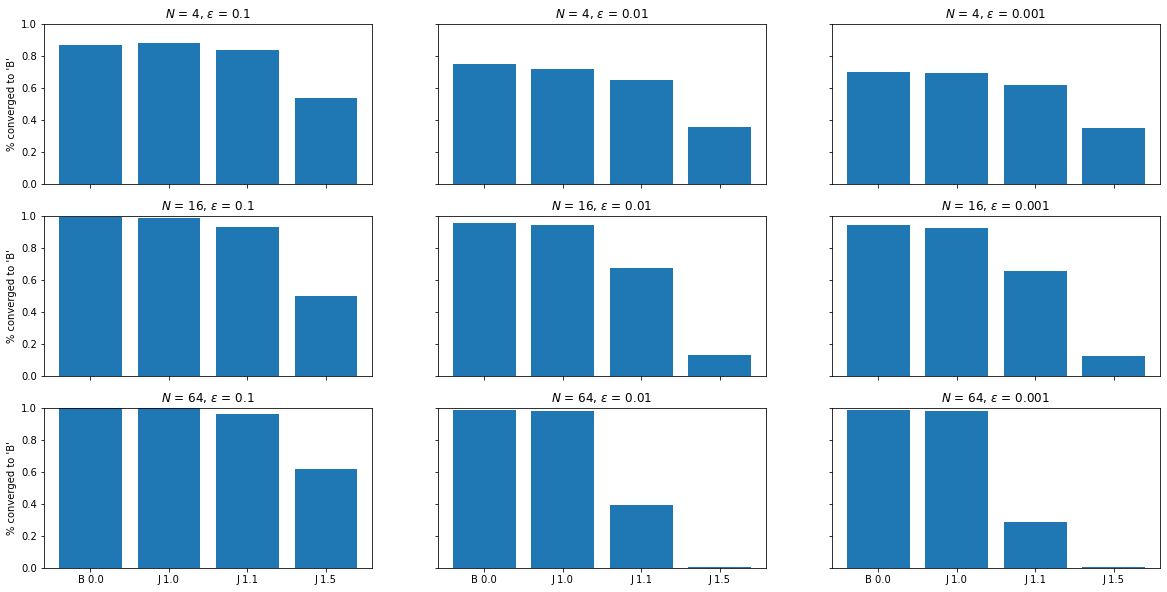

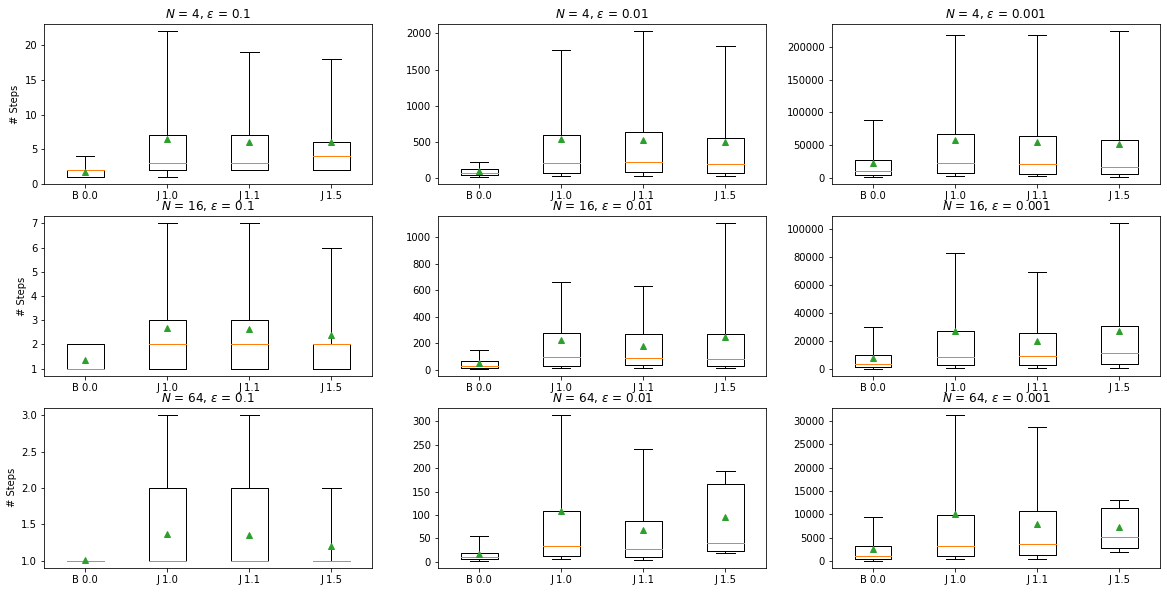

In [91]:
# Plot

fig0, axes0 = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(20, 10))

for i in range(3):
    for j in range(3):
        axes0[i][j].set(ylim=[0, 1], title=titles[i][j])
        if j == 0:
            axes0[i][j].set(ylabel="% converged to 'B'")

        axes0[i][j].bar(results0[i][j].keys(),
                        results0[i][j].values())

fig1, axes1 = plt.subplots(3, 3, figsize=(20, 10))

for i in range(3):
    for j in range(3):

        axes1[i][j].set(title=titles[i][j])
        if j == 0:
            axes1[i][j].set(ylabel="# Steps")

        means = []
        for value in results1[i][j].values():
            mu = np.mean(value)
            means.append(mu)

        axes1[i][j].boxplot(results1[i][j].values(), showmeans=True, whis=[5, 95], showfliers=False)
        axes1[i][j].set_xticklabels(results1[i][j].keys())



In [ ]:
complete.query("epsilon == 0.001 & trials == 4 & mistrust == 1").groupby("size").count()

In [ ]:
B.groupby("mistrust").uid.describe()

# 2. Zollman Effect

In [ ]:
# Load all networks

NETWORKKINDS = ["complete", "cycle", "random", "star", "wattsstrogatz", "barabasialbert"]

results = {}
for kind in NETWORKKINDS:
    results[kind] = pd.read_csv(f"../polygraphs-cache/zollman-effect/summary/{kind}.csv")

## A. Random networks

### I. Effect of density on convergence

##### Notes

Show percentage of simulations converging to the truth (action $B$) on the $y$ axis, and network density on the $x$ axis.

Do this for each `trials` value ($\epsilon$ at `0.001`), and then plot these all together.

Extra analysis include:

* Repeat the above, for each of the other $\epsilon$ values. 

* Use probability of connection on the $x$ axis, rather than density.

In [ ]:
data = results["random"].copy()

print(f"Epsilon\t{sorted(data.epsilon.unique())}")
print(f"Trials\t{sorted(data.trials.unique())}")
print(f"Size\t{sorted(data['size'].unique())}")

data

In [ ]:
data = myfilter(data, epsilon=None, trials=None, size=None)

data.plot.scatter(x="density",
                  y="clustering",
                  xlim=[0, 1],
                  ylim=[0, 1])

In [ ]:
bcdf(data)

In [ ]:
random["clustering1"] = pd.cut(random.clustering, 5)
random.groupby("clustering1").undefined.size()

In [ ]:
random.loc[random.epsilon == 0.001, ['action', 'density']]

In [ ]:
random.hist('density', by=random.epsilon, bins=5)

In [ ]:
data = random.copy()
data.density = pd.cut(data.density, 5)
B = data.query("epsilon == 0.001 & size > 4 & action == 'B'").groupby("density").action.count()
N = data.query("epsilon == 0.001 & size > 4").groupby("density").action.count()
result = pd.merge(B, N, on="density").reset_index()
result["average"] = result.action_x / result.action_y
result.plot(x="density", y="average")

### II. Effect of density on time to convergence

##### Notes

Show time to convergence to $B$ on the $y$ axis, and density on the $x$ axis. 

Filter out any simulations that converged to A. 

It will be crucial to capture the mean value of $y$ (for any given $x$ value) - but it would be nice to also capture the distribution in a box plot.

In [ ]:
data = random.copy()
data.density = pd.cut(data.density, 5)
B = data.query("epsilon == 0.001 & action == 'B'").groupby("density").steps.describe().reset_index()
print(B)
B.plot.line(x="density", y="mean")

## B. Watts-Strogatz networks

### I. Effect of density on convergence

##### Notes

As with random networks.

A plot showing random and Watts-Strogatz networks could be good, as it would enable direct comparison relatively easily.

Plot of Wattstrogatz simulations with a given density (and so filtered by `knn`) with probability of rewiring on the $x$ axis.

In [ ]:
data = results["wattsstrogatz"].copy()

print(f"Epsilon\t{sorted(data.epsilon.unique())}")
print(f"Trials\t{sorted(data.trials.unique())}")
print(f"Size\t{sorted(data['size'].unique())}")

data.prob.unique()

In [ ]:
data = myfilter(data, epsilon=None, trials=None, size=None) #extras="density > 0.2 & density < 0.4")

data.plot.scatter(x="density",
                  y="clustering",
                  xlim=[0, 1],
                  ylim=[0, 1])

In [ ]:
bcdf(data)

In [ ]:
wattsstrogatz["clustering1"] = pd.cut(wattsstrogatz.clustering, 5)
wattsstrogatz.groupby("clustering1").undefined.size()

In [ ]:
data = wattsstrogatz.copy()
data.density = pd.cut(data.density, 4)
B = data.query("epsilon == 0.001 & size > 0 & action == 'B'").groupby("density").action.count()
N = data.query("epsilon == 0.001 & size > 0").groupby("density").action.count()
result = pd.merge(B, N, on="density").reset_index()
result["average"] = result.action_x / result.action_y
result.plot(x="density", y="average")

### II. Effect of density on time to convergence

##### Notes

As with random networks.

In [ ]:
data = wattsstrogatz.copy()
data.density = pd.cut(data.density, 5)
B = data.query("epsilon == 0.001 & action == 'B'").groupby("density").steps.describe().reset_index()
print(B)
B.plot.line(x="density", y="mean")

In [ ]:
data = wattsstrogatz.copy()
data.clustering = pd.cut(data.clustering, 4)
B = data.query("epsilon == 0.001 & size > 0 & action == 'B'").groupby("clustering").action.count()
N = data.query("epsilon == 0.001 & size > 0").groupby("clustering").action.count()
result = pd.merge(B, N, on="clustering").reset_index()
result["average"] = result.action_x / result.action_y
result.plot(x="clustering", y="average")

In [ ]:
data = random.copy()
data.clustering = pd.cut(data.clustering, 4)
B = data.query("epsilon == 0.001 & size > 0 & action == 'B'").groupby("clustering").action.count()
N = data.query("epsilon == 0.001 & size > 0").groupby("clustering").action.count()
result = pd.merge(B, N, on="clustering").reset_index()
result["average"] = result.action_x / result.action_y
result.plot(x="clustering", y="average")

## B. Barabasi-Albert networks

In [ ]:
data = results["barabasialbert"].copy()

print(f"Epsilon\t{sorted(data.epsilon.unique())}")
print(f"Trials\t{sorted(data.trials.unique())}")
print(f"Size\t{sorted(data['size'].unique())}")

data

In [ ]:
data = myfilter(data, epsilon=None, trials=None, size=None)

data.plot.scatter(x="density",
                  y="clustering",
                  xlim=[0, 1],
                  ylim=[0, 1])

In [ ]:
bcdf(data)